In [17]:
# Librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing


## DIAMOND TEST

In [18]:
# CSV diamonds_test
df_Diamond_test=pd.read_csv('./diamonds_test.csv')
df_Diamond_test

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat


In [19]:
#df_Diamond_test.drop(['color','clarity','city','cut'], inplace=True, axis=1)

In [20]:
df_Diamond_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
 10  city     13485 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [21]:
# One hot encoding
cat_cols = ['color', 'clarity', 'city', 'cut']
df_Diamond_test = pd.get_dummies(df_Diamond_test, columns=cat_cols, drop_first=True)
df_Diamond_test


,id,carat,depth,table,x,y,z,color_E,color_F,color_G,...,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0,0.79,62.7,60.0,5.82,5.89,3.67,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0.90,63.8,54.0,6.09,6.13,3.90,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.50,62.9,58.0,5.05,5.09,3.19,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,61.9,56.0,5.35,5.32,3.30,1,0,0,...,0,0,0,0,0,0,0,1,0,0
13481,13481,0.71,62.2,55.0,5.71,5.73,3.56,0,0,0,...,0,1,0,0,0,0,0,1,0,0
13482,13482,0.70,61.6,55.0,5.75,5.71,3.53,0,1,0,...,0,0,0,0,1,0,0,1,0,0
13483,13483,0.70,58.8,57.0,5.85,5.89,3.45,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [22]:
# Scaling

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_Diamond_test)
scaled_data

array([[-1.73192237, -0.01841187,  0.66950043, ..., -0.80857254,
        -0.59559362,  1.87471681],
       [-1.73166548,  0.85507765, -0.51495701, ...,  1.23674742,
        -0.59559362, -0.5334139 ],
       [-1.7314086 ,  1.64334867,  0.3211306 , ..., -0.80857254,
         1.67899715, -0.5334139 ],
       ...,
       [ 1.7314086 , -0.21015347, -0.09691321, ...,  1.23674742,
        -0.59559362, -0.5334139 ],
       [ 1.73166548, -0.21015347, -2.04778429, ..., -0.80857254,
        -0.59559362,  1.87471681],
       [ 1.73192237, -0.84929214,  0.46047853, ...,  1.23674742,
        -0.59559362, -0.5334139 ]])

# Predict test

In [32]:
%%time

# Model predictions

#predictions = model.predict(df_Diamond_test)
y_pred = model.predict(df_Diamond_test)

print(type(y_pred))

C:\Users\abarr\miniconda3\envs\M3_ih\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


<class 'numpy.ndarray'>
CPU times: total: 234 ms
Wall time: 268 ms


In [33]:
df_predictions = pd.DataFrame(y_pred, columns=['price']).reset_index()
df_predictions
#df.columns = ['new_col1', 'new_col2', 'new_col3', 'new_col4']

,index,price
0,0,101.748597
1,1,153.527924
2,2,208.962434
3,3,105.284903
4,4,90.839935
...,...,...
13480,13480,100.347107
13481,13481,161.994359
13482,13482,111.270445
13483,13483,126.953946


In [34]:

df_predictions['id']=df_predictions.index
df_predictions

,index,price,id
0,0,101.748597,0
1,1,153.527924,1
2,2,208.962434,2
3,3,105.284903,3
4,4,90.839935,4
...,...,...,...
13480,13480,100.347107,13480
13481,13481,161.994359,13481
13482,13482,111.270445,13482
13483,13483,126.953946,13483


In [35]:
df_predictions_d=df_predictions.drop('index', axis=1)
df_predictions_d

,price,id
0,101.748597,0
1,153.527924,1
2,208.962434,2
3,105.284903,3
4,90.839935,4
...,...,...
13480,100.347107,13480
13481,161.994359,13481
13482,111.270445,13482
13483,126.953946,13483


In [36]:
df_predictions_d.to_csv('train.csv', index=False)

In [ ]:
# 5169 PUNTOS EN KAGGLE (Prueba 13 Mejor puntuacion)

## DIAMOND TRAIN FEATURE ENGENEERING

In [ ]:
# CSV EDA
df_train=pd.read_csv('competi_kaggle.csv')
df_train
 



In [ ]:
x=df_train.drop('index_id', axis=1)
x

In [ ]:
df_train.info()

In [ ]:
#df_train.drop(['color','clarity','city','cut'], inplace=True, axis=1)



In [ ]:
#One hot encoding
cat_cols = ['color', 'clarity', 'city', 'cut']
df_train= pd.get_dummies(df_train, columns=cat_cols, drop_first=True)
df_train

In [ ]:
df_train.drop('index_id', axis=1, inplace=True)

In [ ]:
df_train.info()

In [ ]:
# Scaling

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_train)
scaled_data

In [25]:
# Data Imbalance


In [26]:
# Load datasets

X, y = make_regression(n_samples=40000, n_features=36, random_state=42)
#X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape, y.shape)

(40000, 36) (40000,)


In [27]:
# Train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (32000, 36), X_test: (8000, 36), y_train: (32000,), y_test: (8000,)


# Regresion Estimators

In [28]:
%%time

# Model definition

#model = LinearRegression()
model = RandomForestRegressor()

hyperparameters = model.get_params()



print(type(model), '\n')
print('Model hyperparameters:', hyperparameters, '\n')

<class 'sklearn.ensemble._forest.RandomForestRegressor'> 

Model hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
%%time

# Model training

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Model:', model, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
#print('Model coefficients:', model.coef_, '\n')
print('Ground truth target:', y_test, '\n')
print('Ground truth target:', y_pred, '\n')

# Predict Train

In [ ]:
%%time

# Model predictions

#predictions = model.predict(X_test)
y_pred = model.predict(X_test)

print(type(y_pred))

In [ ]:
# Visual check

check = pd.DataFrame({'Ground truth':y_test, 'Predictions':y_pred, 'Diff':y_test-y_pred})
check

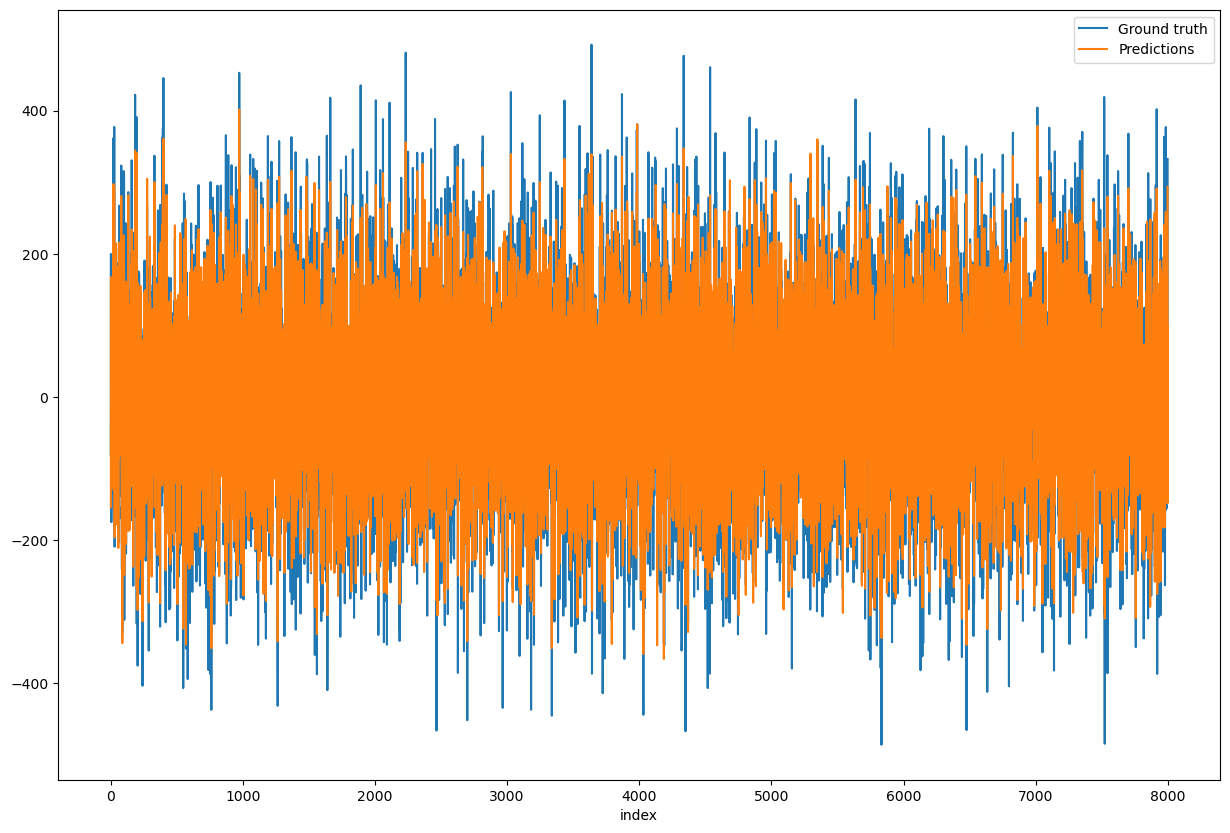

In [410]:
# Visualización

check.reset_index(inplace=True)

check.plot(x='index', y=['Ground truth', 'Predictions'], kind='line', figsize=(15, 10));

## EDA

In [ ]:
df_train.info()

In [ ]:
df_train.describe()

In [ ]:
df_train.corr()

In [ ]:
ax = sns.heatmap(df_train, cmap="YlGnBu")